In [ ]:
import sys
sys.path.append('..')
from osp import *

In [2]:
df = get_pmla_df().set_index('id')

100%|██████████| 71902/71902 [00:04<00:00, 17718.23it/s]


In [37]:
all_tree_stats = []
for id,docstr in PMLA_STASH.items():
    doc = stanza.Document.from_serialized(docstr)
    tree_stats = pd.DataFrame(get_tree_stats(sent) for sent in doc.sentences)
    tree_stats['id'] = id
    all_tree_stats.append(tree_stats)
all_tree_stats = pd.concat(all_tree_stats)

In [38]:
for col in all_tree_stats.columns:
    if col not in ['id','num_words']:
        all_tree_stats[col+'_per_word'] = all_tree_stats[col] / all_tree_stats['num_words']

In [39]:
df_all_tree_stats = all_tree_stats.merge(df, on='id', how='left')
odf = df_all_tree_stats.groupby('decade').mean(numeric_only=True)

In [43]:
figdf = odf.drop(columns=['year','publicationYear']).reset_index().melt(id_vars=['decade'])
figdf = figdf[~figdf['variable'].str.contains('per_word')]
figdf

,decade,variable,value
0,1900,num_words,30.759944
1,1910,num_words,27.943336
2,1920,num_words,34.345625
3,1930,num_words,27.997061
4,1940,num_words,35.133745
...,...,...,...
247,1970,wordCount,7340.645318
248,1980,wordCount,6947.373649
249,1990,wordCount,9643.852896
250,2000,wordCount,11011.379482


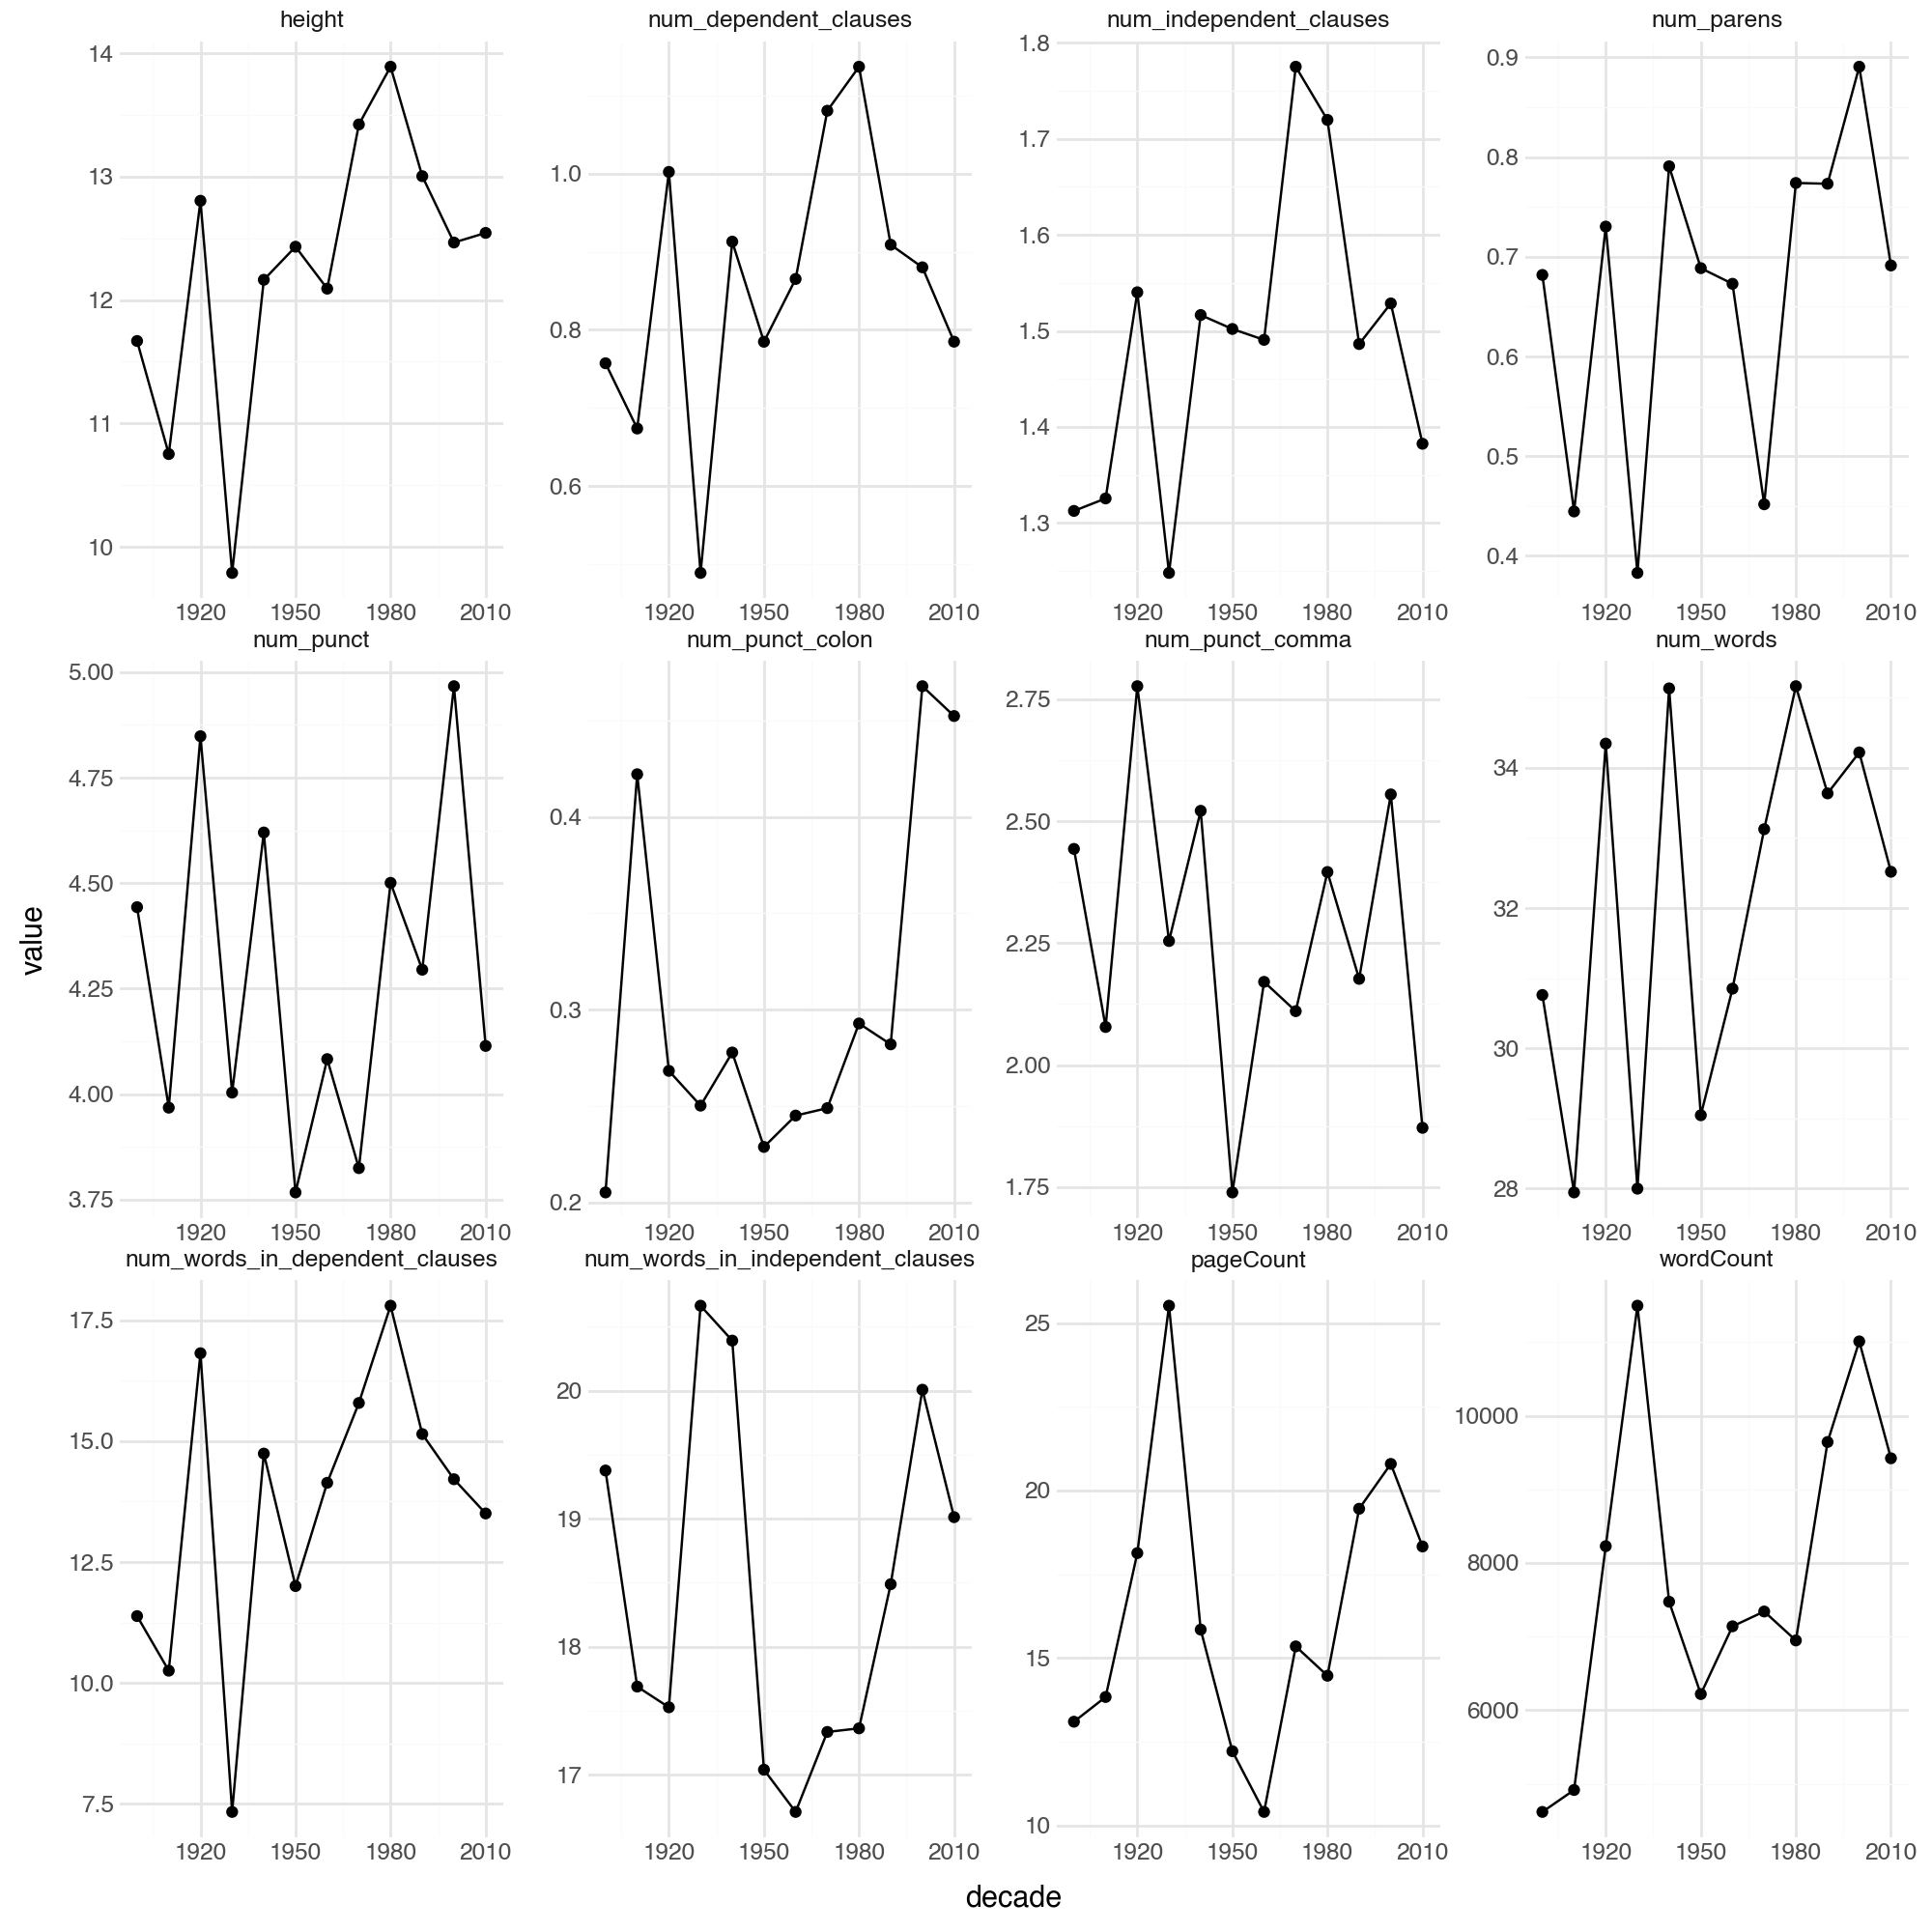

In [44]:
# !pip install plotnine
import plotnine as p9
p9.options.figure_size = (10, 10)
fig = p9.ggplot(figdf, p9.aes(x='decade', y='value')) + p9.geom_point() + p9.geom_line() + p9.theme_minimal() + p9.facet_wrap('variable', scales='free')
fig

In [42]:
df_all_tree_stats.groupby('decade')['id'].nunique()

decade
1900    9
1910    9
1920    9
1930    9
1940    9
1950    9
1960    9
1970    9
1980    9
1990    8
2000    8
2010    8
Name: id, dtype: int64